In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

# Brewing beer

How to find the best recipe for a new beer without brewing a large number of trial batches?

In [2]:
from utils import beer_score

def inverse_beer_score(points):
    return -1. * beer_score(points)

In [3]:
budget = 50

bounds = [(2., 14.), (5., 80.)]

# `scipy.optimize` - what else

`scipy` has a minimizer built in. Why wouldn't we use that? Well tested, used by lots of people, easy to use.

In [4]:
from scipy import optimize

In [5]:
optimize.fmin_l_bfgs_b(inverse_beer_score, (8., 40.),
                       bounds=bounds,
                       maxfun=budget,
                       approx_grad=True
                      )

(array([  7.15324148,  28.75466952]),
 -0.41207232759453039,
 {'funcalls': 54,
  'grad': array([ 0.00094426, -0.00042696]),
  'nit': 8,
  'task': b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT',
  'warnflag': 1})

In [6]:
history = []
def record_beer_score(x):
    history.append(x)
    return inverse_beer_score(x)

In [7]:
optimize.fmin_l_bfgs_b(record_beer_score, (8., 40.), bounds=bounds,
                       maxfun=budget,
                       approx_grad=True
                      )

(array([  7.15324148,  28.75466952]),
 -0.41207232759453039,
 {'funcalls': 54,
  'grad': array([ 0.00094426, -0.00042696]),
  'nit': 8,
  'task': b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT',
  'warnflag': 1})

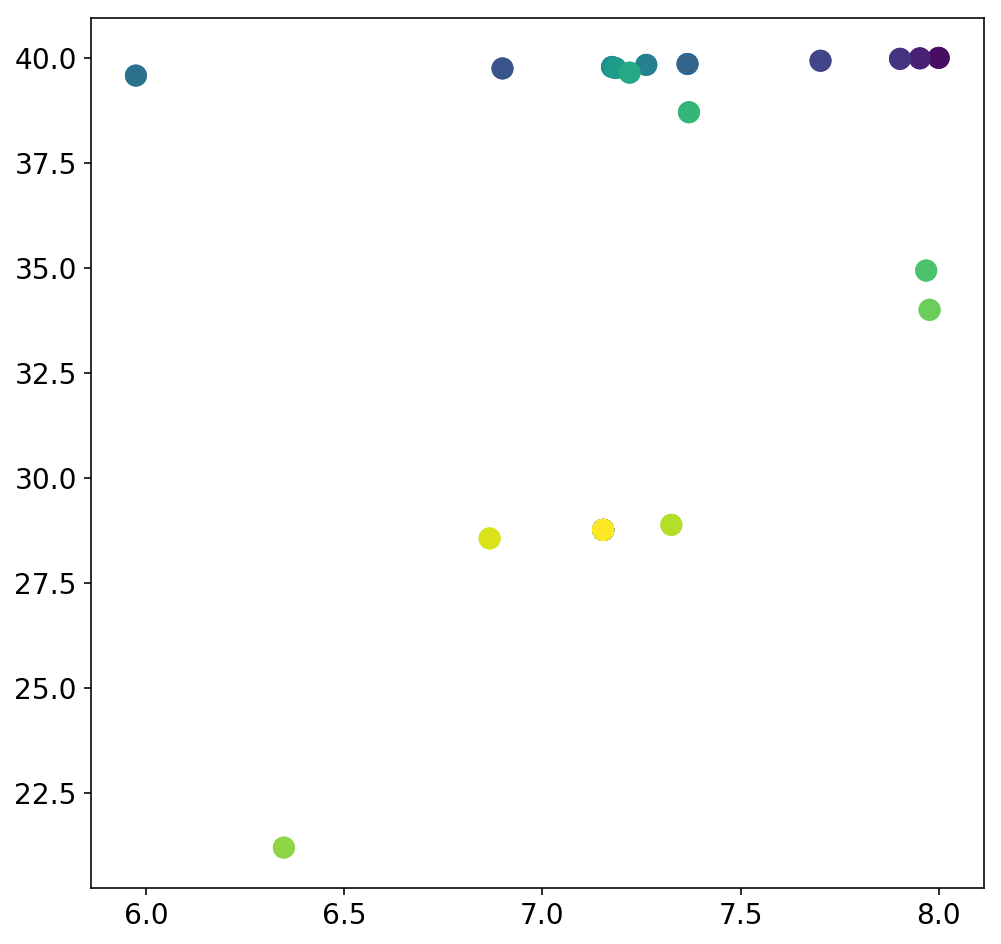

In [8]:
plt.scatter(*list(zip(*history)), c=range(len(history)), cmap='viridis');

In [9]:
history[:10]

[array([  7.15324148,  28.75466952]),
 array([  8.00000001,  40.        ]),
 array([  8.        ,  40.00000001]),
 array([  7.15324148,  28.75466952]),
 array([  7.95257597,  39.98851   ]),
 array([  7.95257596,  39.98851001]),
 array([  7.15324148,  28.75466952]),
 array([  7.90241435,  39.97704877]),
 array([  7.90241434,  39.97704878]),
 array([  7.15324148,  28.75466952])]